**Customer_segmentation**

In [10]:
#'''Analysing the content of an E-commerce database that contains list of purchases. Based on the analysis,
#I develop a model that allows to anticipate the purchases that will be
# made by a new customer, during the following year from its first purchase.'''

In [11]:
#Part One: Data Analysis and Data Cleaning
#Part Two: Customer Segmentation
#Part Three: Supervised Learning Model

This project will show you how to cluster customers on segments based on their behavior using the K-Means algorithm in Python.
I hope that this project will help you on how to do customer segmentation step-by-step from preparing the data to cluster it.This project will show you how to cluster customers on segments based on their behavior using the K-Means algorithm in Python.
I hope that this project will help you on how to do customer segmentation step-by-step from preparing the data to cluster it.

**Import Libraries:**

In [12]:
#import python libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load and Preprocess Data:**

In [13]:
df=pd.read_csv("/content/Mall_Customers.csv") #read dataset


In [14]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [20]:
df.shape

(200, 5)

In [21]:
df.size

1000

In [22]:
df.loc[0,:]

CustomerID                   1
Genre                     Male
Age                         19
Annual Income (k$)          15
Spending Score (1-100)      39
Name: 0, dtype: object

In [23]:
df.iloc[:,-1]

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [24]:
df.iloc[:,[-1,-2,-3,-4]] #integer location based on indexing

,Spending Score (1-100),Annual Income (k$),Age,Genre
0,39,15,19,Male
1,81,15,21,Male
2,6,16,20,Female
3,77,16,23,Female
4,40,17,31,Female
...,...,...,...,...
195,79,120,35,Female
196,28,126,45,Female
197,74,126,32,Male
198,18,137,32,Male


**Bar Plot**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# count plot count categorical data

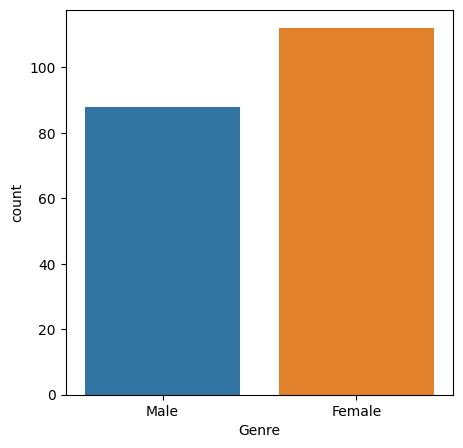

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='Genre',data=df)
plt.show()

In [28]:
##sns.countplot(x='Genre',data=df,hue='Annual Income (k$)')

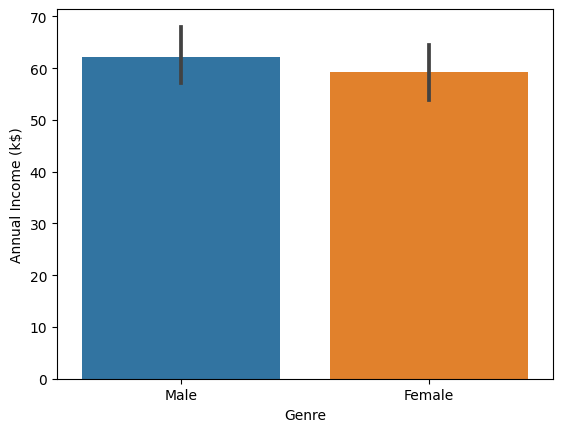

In [29]:
sns.barplot(x='Genre',y='Annual Income (k$)',data=df)
plt.show()

 **Pie-Chart**

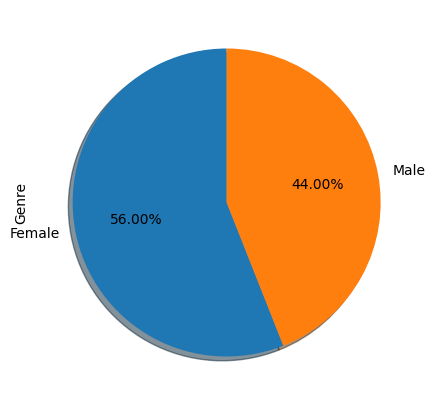

In [30]:
plt.figure(figsize=(8,5))
df.Genre.value_counts().plot.pie( autopct='%.2f%%',radius=1,shadow=True,startangle=90)
plt.show()

 The percentage of female is 56%, whereas the percentage of male in our customer dataset is 44%.

Age :  we will plot a histogram to view the distribution of customer ages.

In [31]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

**Histogram**

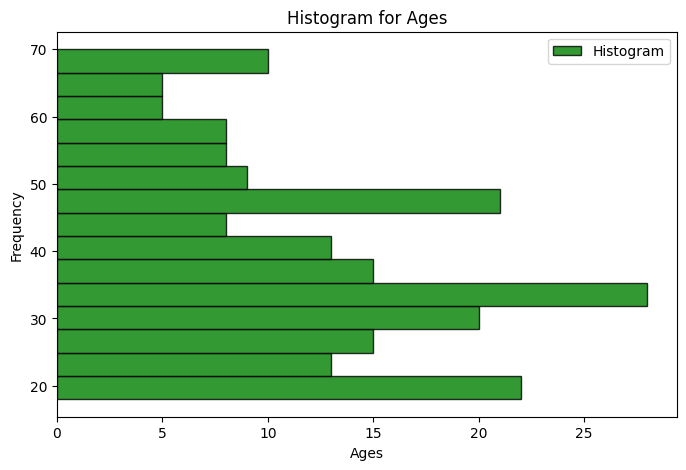

In [32]:
plt.figure(figsize=(8,5))
df.Age.plot.hist(bins=15,alpha=.8,color='green',edgecolor='black',align='mid',orientation="horizontal",label='Histogram')
plt.title("Histogram for Ages")
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Box-plot**

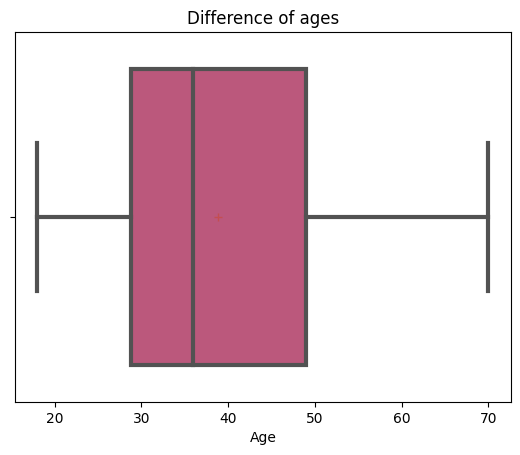

In [33]:
#From the above graphs, we can obviously conclude that most of the customers have an age between 30 and 50,
#  MINimum age of customers is 18, whereas the MAXimum age is 70.
sns.boxplot(x='Age',data=df,hue='Age',showmeans=True,meanprops={'marker':'+','markeredgecolor':'r'},linewidth=3,palette='plasma',orient='horizontal')
sns.set(style='darkgrid')
plt.title("Difference of ages")
plt.show()

**Annual Income**
 Annual Income feature using a histogram and a density plots to get insight from this feature.

In [34]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

 **Histogram**

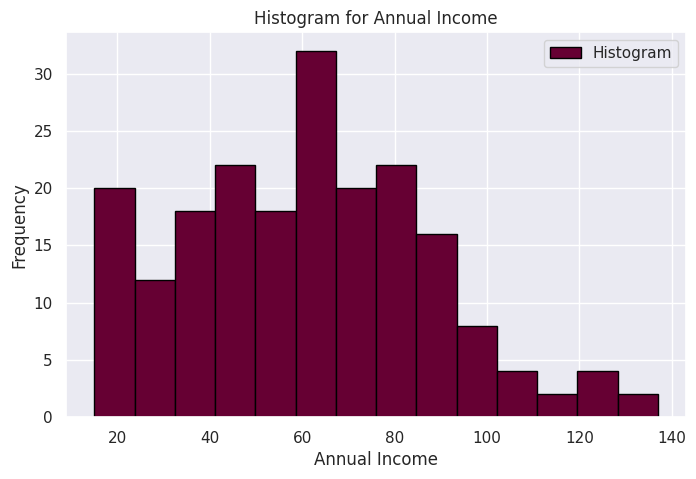

In [35]:
plt.figure(figsize=(8,5))
df['Annual Income (k$)'].plot.hist(bins=14,color="#660033",edgecolor='black',align='mid',orientation="vertical",label='Histogram')
plt.title("Histogram for Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.legend()
plt.show()


From the above graphs, we can see that the minimum annual income of the customers is 20 while the maximum income is 140. People earning an average income of 60-70 have the highest frequency count in our histogram distribution.

<ipython-input-36-2ecdad86898b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Annual Income (k$)'], color="blue", shade=True,bw_adjust=5,palette="crest",linewidth=0.5,fill=True)
<ipython-input-36-2ecdad86898b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Annual Income (k$)'], color="blue", shade=True,bw_adjust=5,palette="crest",linewidth=0.5,fill=True)


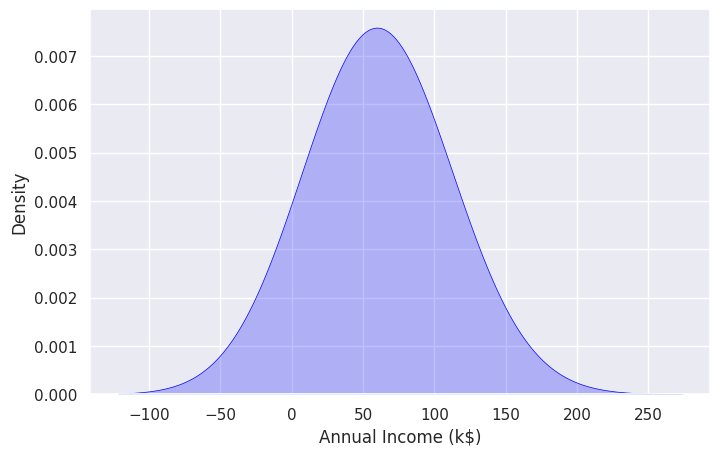

In [36]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Annual Income (k$)'], color="blue", shade=True,bw_adjust=5,palette="crest",linewidth=0.5,fill=True)
plt.show()


The average income of all the customers is 50. In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

**Spending_Score**:by this we will analyse the spending score feature.

In [37]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

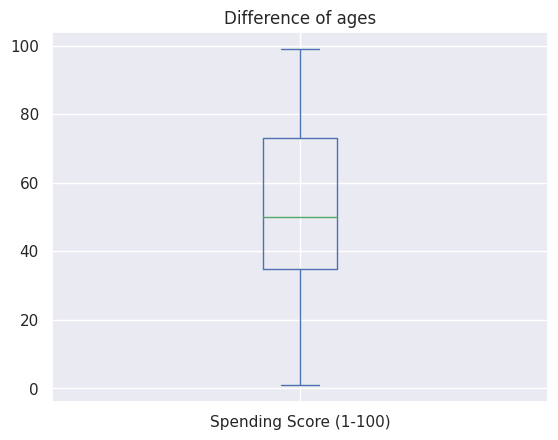

In [38]:
df['Spending Score (1-100)'].plot.box()
sns.set(style='ticks')
plt.title("Difference of ages")
plt.show()
plt.show()

<ipython-input-39-7a15f92161c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'],label='Spending Score')


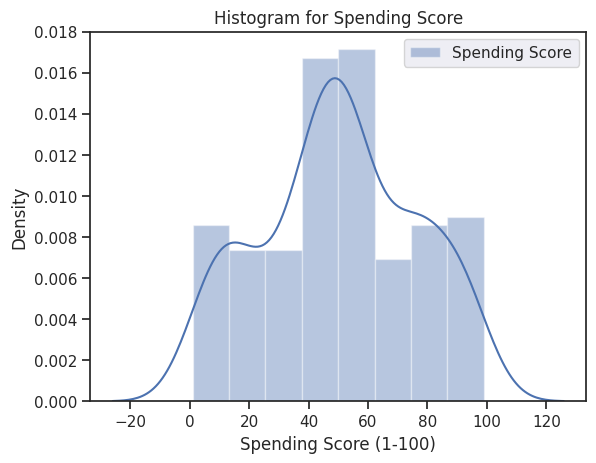

In [39]:
sns.distplot(df['Spending Score (1-100)'],label='Spending Score')
sns.set()
plt.legend() #for label
plt.title("Histogram for Spending Score")
plt.show()

We'll use the scikit-learn library for clustering and the matplotlib library was already use for data visualization.

In [40]:
pip install scikit-learn matplotlib


**Standardize Data:**

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#Standardize (rescale the feature) the data so that all features have a mean of 0 and a standard deviation of 1.
# This step is essential when working with k-means clustering.
#if data follow normal distribution.

In [42]:
# Select only the numeric features
X = df[['Age','CustomerID','Annual Income (k$)','Spending Score (1-100)']]



**OR**

In [43]:
#Encode Categorical Data (if needed):
#If you have non-numeric categorical columns (e.g., "Gender" with values like 'Male' and 'Female'),
# you can encode them using one-hot encoding or label encoding. Here's an example using one-hot encoding:
# Assuming "Gender" is a non-numeric categorical column.

#df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

#After one-hot encoding, "Gender" would be represented as binary columns, such as "Gender_Male" and "Gender_Female."


In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
#Make sure to adapt the preprocessing steps to your specific dataset,
#including handling non-numeric columns and categorical data appropriately.

**Elbow Method for finding the Optimal Number of Clusters in K-Means**

In [46]:
"""Determine the Optimal Number of Clusters:
You can use the Elbow method to determine the optimal number of clusters.
This involves running k-means for a range of cluster values and plotting the sum of squared distances (inertia) for each cluster size.
The "elbow" point on the plot is typically a good choice for the number of clusters (elbow point which is called as BEST CASE at k=4)."""

'Determine the Optimal Number of Clusters:\nYou can use the Elbow method to determine the optimal number of clusters.\nThis involves running k-means for a range of cluster values and plotting the sum of squared distances (inertia) for each cluster size. \nThe "elbow" point on the plot is typically a good choice for the number of clusters.'

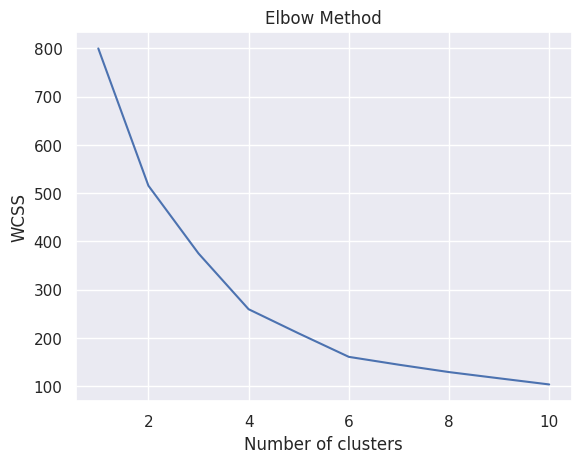

In [47]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


**Fit K-Means Clustering:
After determining the optimal number of clusters, fit the k-means clustering algorithm to the data.**

In [48]:
k = 3  # Replace with the optimal number of clusters from the Elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=0)

**Assign Cluster Labels:-
Assign cluster labels to each data point**

In [49]:
df['Cluster'] = kmeans.labels_


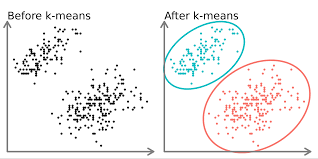

In [57]:
from IPython.display import Image

# image_path' with the path to your image file
image_path = '/content/download.png'
Image(filename=image_path)
Image('/content/download.png',width=800)


**Visualize the Clusters:**

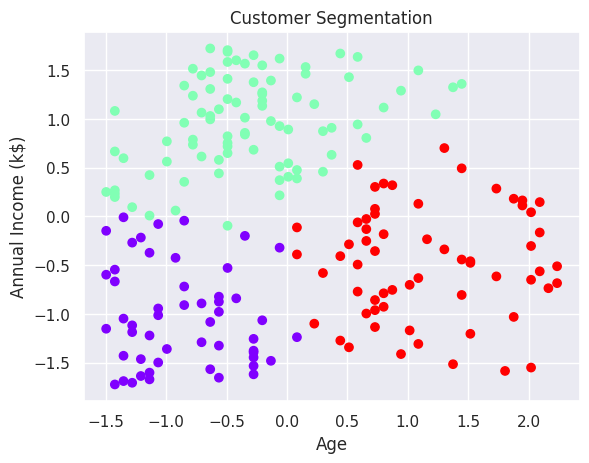

In [50]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segmentation')
plt.show()


**OR  Determining Optimal number of Clusters using Average Silhouette Method:**

While working with clusters, we need to specify the number of clusters to use. Thus we need to find the optimal number of clusters, to do that we will use the Silhouette method.

Average Silhouette Method:

With the help of the average silhouette method, we can measure the quality of our clustering operation. With this, we can determine how well within the cluster is the data object. If we obtain a high average silhouette width, it means that we have good clustering. The average silhouette method calculates the mean of silhouette observations for different k values. With the optimal number of k clusters, one can maximize the average silhouette over significant values for k clusters.

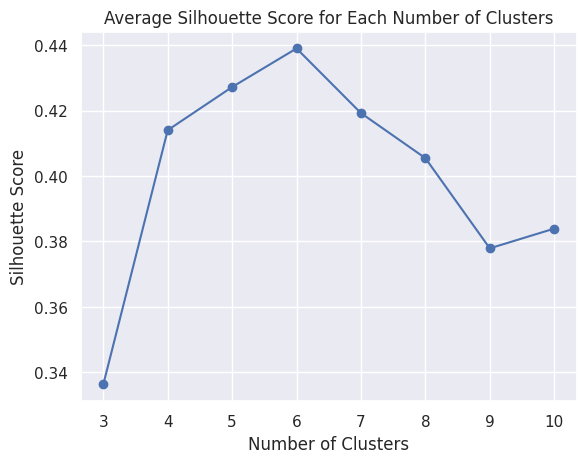

In [59]:
from sklearn.metrics import silhouette_score
# Create a list to store silhouette scores for different numbers of clusters
silhouette_scores = []
# Define a range of cluster numbers to evaluate
min_clusters = 3
max_clusters = 10
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Compute the silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Average Silhouette Score for Each Number of Clusters')
plt.show()
